In [31]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append("..")

from utils.aws import read_json
from utils.metrics import windiff
from constants import *

def plot_predictions_vs_ground_truths(predictions, ground_truths, video_id):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

    # Plot predictions
    ax1.plot(predictions, color='blue')
    ax1.set_title(f'Predictions: {video_id}')
    ax1.set_ylabel('Activation')
    ax1.set_ylim(0, 1)

    # Plot ground truths
    ax2.plot(ground_truths, color='red')
    ax2.set_title(f'Ground Truths: {video_id}')
    ax2.set_xlabel('Sentence Index')
    ax2.set_ylabel('Activation')
    ax2.set_ylim(0, 1)

    plt.tight_layout()
    plt.show()

Results loaded successfully.


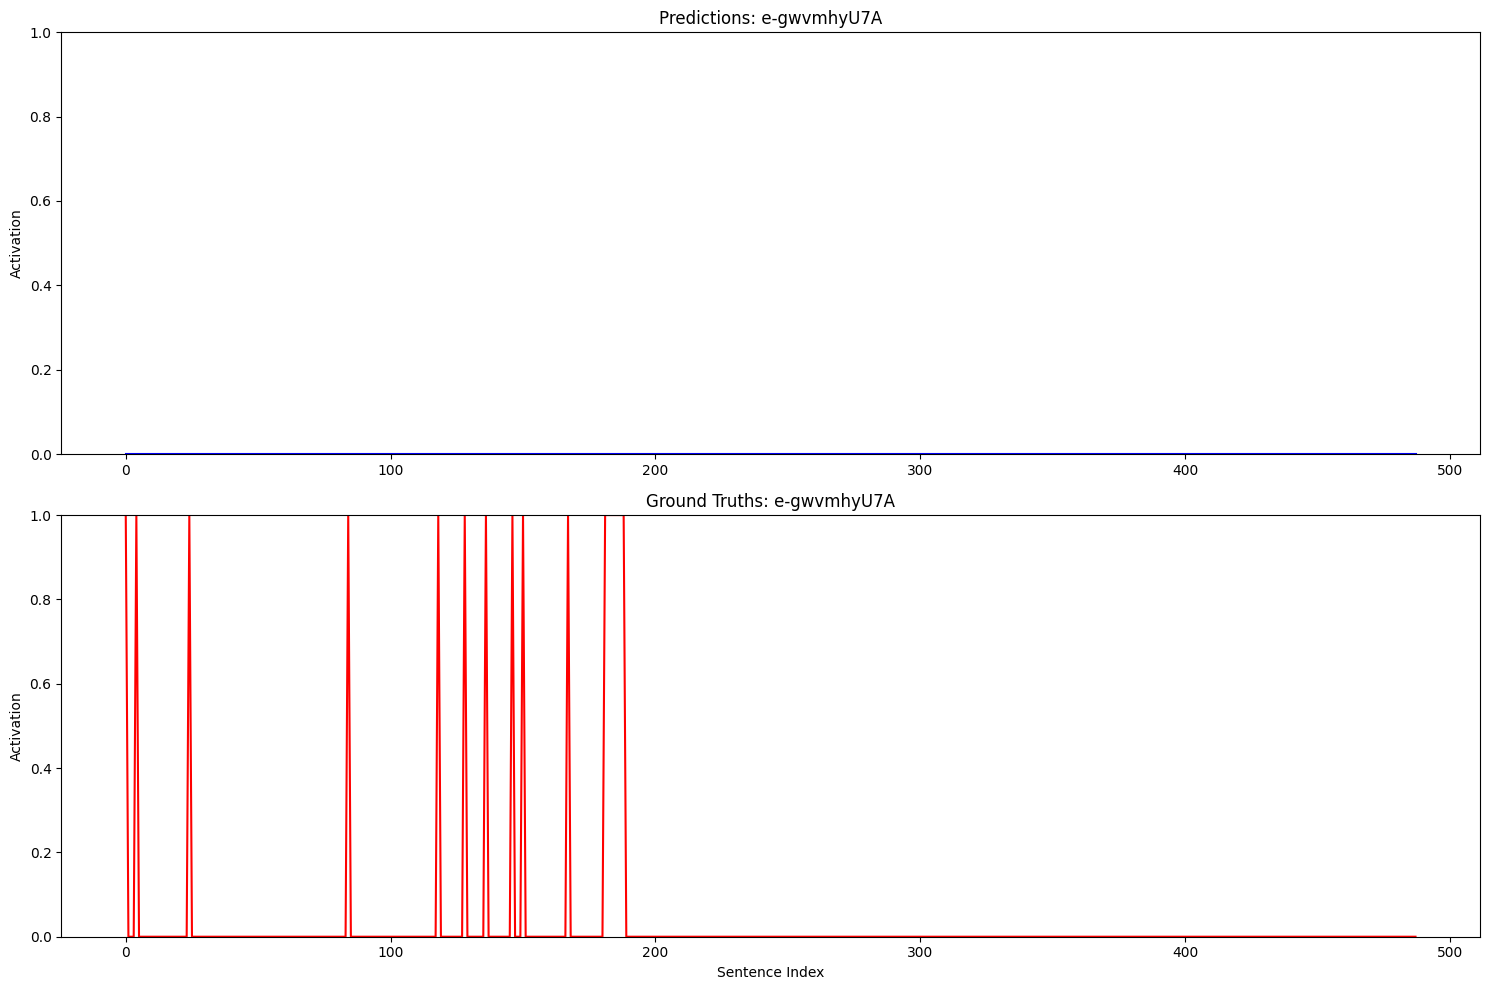

Window diff: 0.11570247933884298


In [33]:
# Input the video id
video_id = "e-gwvmhyU7A"

# Load the results from S3
s3_file_key = f"{S3_MODELS_DIR}/eval/{video_id}_results.json"
results = read_json(S3_BUCKET_NAME, s3_file_key)
print("Results loaded successfully.")

# Plot the predictions vs ground truths
predictions = np.array(results['predictions'])
ground_truths = np.array(results['ground_truths'])

# Call the function with the loaded data
plot_predictions_vs_ground_truths(predictions, ground_truths, video_id)

# Calculate window diff
window_diff = windiff(predictions, ground_truths, window_size=5)
print(f"Window diff: {window_diff}")

In [49]:
# Load this s3://pod-seg/data/podcasts/e-gwvmhyU7A.json
#podcast_details = read_json(S3_BUCKET_NAME, f"data/podcasts/{video_id}.json")
inds = podcast_details['segment_indicators']
print(len(inds))
print(sum(inds))
print([i for i,x in enumerate(inds) if x == 1])
print(podcast_details['segments'][-1])

488
18
[0, 4, 24, 84, 118, 128, 136, 146, 150, 167, 181, 182, 183, 184, 185, 186, 187, 188]
{'start_time': '02:51:31', 'start_secs': 10291, 'segment_description': 'Future of AI'}


In [34]:
# Construct a dictionary of segment start times
segment_start_times = {}
sentence_start_times = results['sentence_start_times']

for idx, pred in enumerate(predictions):
    if pred == 1:
        segment_start_times[idx] = sentence_start_times[idx]

# Print the array of segment start times
print("Predicted segment start times:")
print([time for time in segment_start_times.values()])

print("Ground truth segment start times:")
print([time for time in results['segment_start_times'].values()])


Predicted segment start times:
[]

Sentence indices where segments start:
[]
